In [1]:
import os

faces_dir = "Data/faces"
face_files = [os.path.splitext(f)[0] for f in os.listdir(faces_dir) if os.path.isfile(os.path.join(faces_dir, f)) and f.endswith('.png')]


In [2]:
face_files

['macron2',
 'macron3',
 'macron1',
 'macron4',
 'macron5',
 'obama3',
 'obama2',
 'trump6_video',
 'obama1',
 'biden5',
 'biden1',
 'trump5_video',
 'biden3',
 'biden2',
 'trump4',
 'biden4_sunglasses',
 'trump2',
 'trump3',
 'trump1']

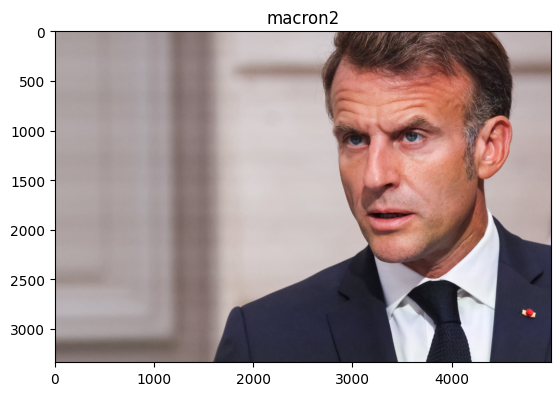

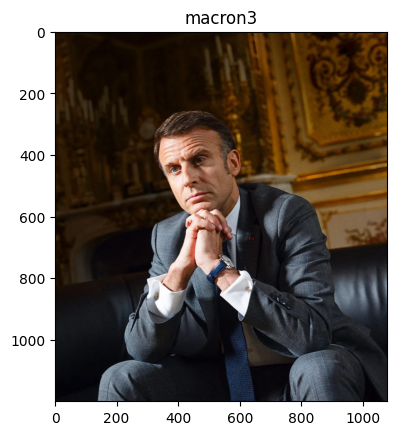

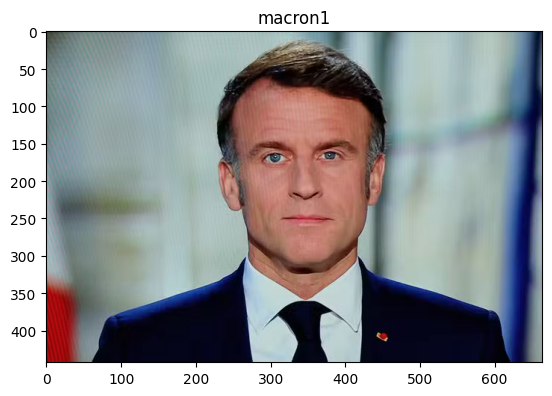

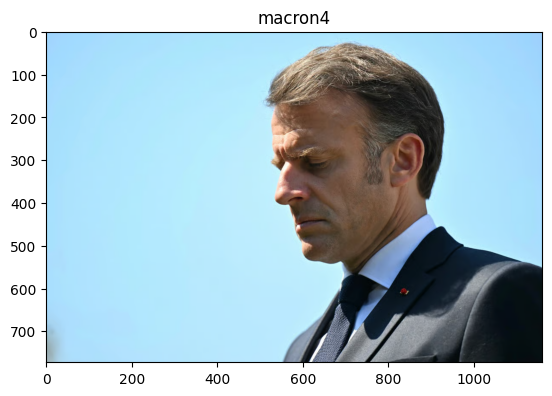

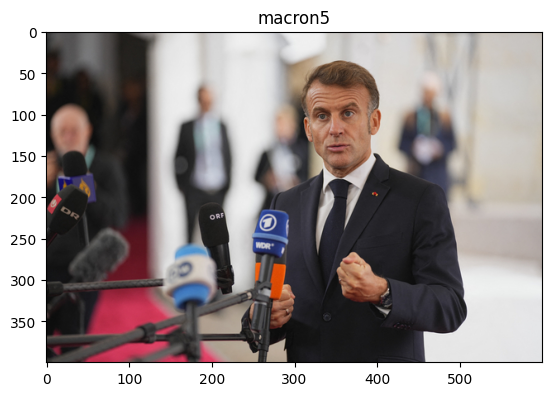

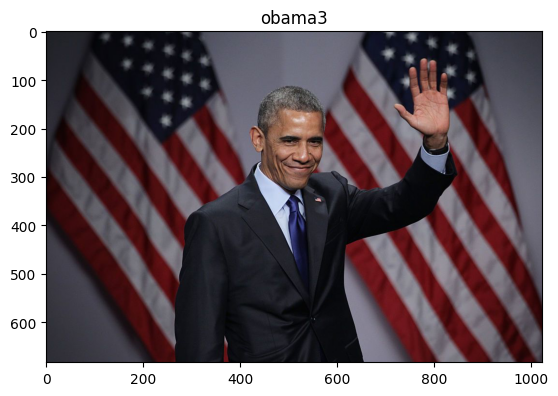

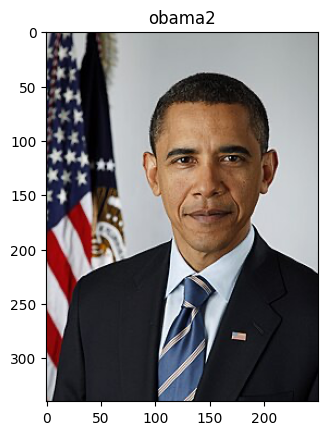

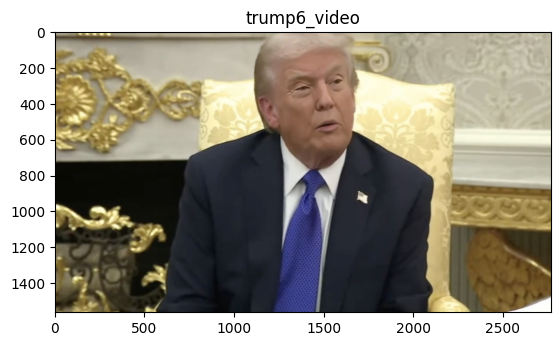

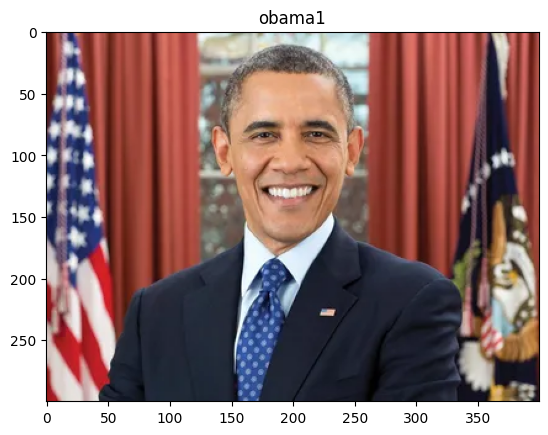

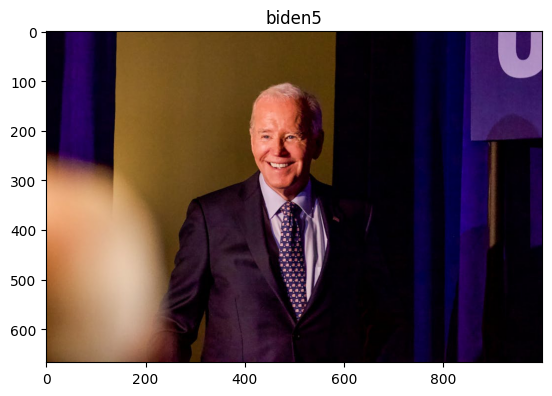

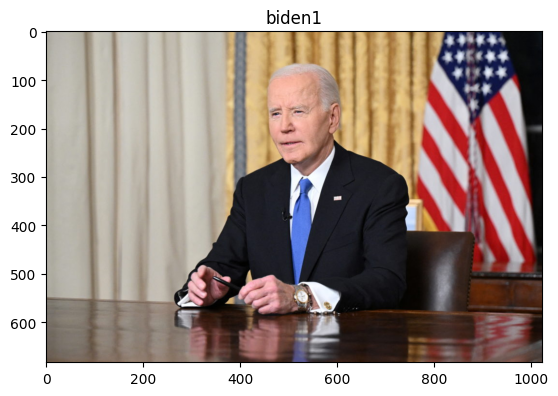

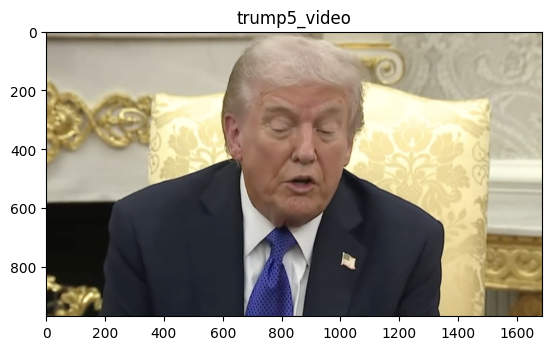

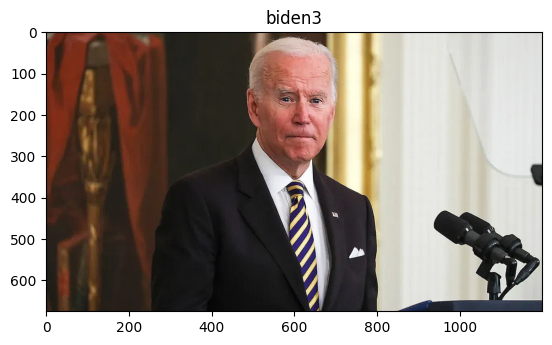

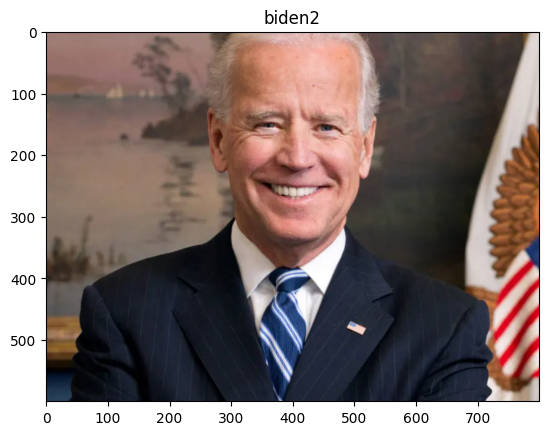

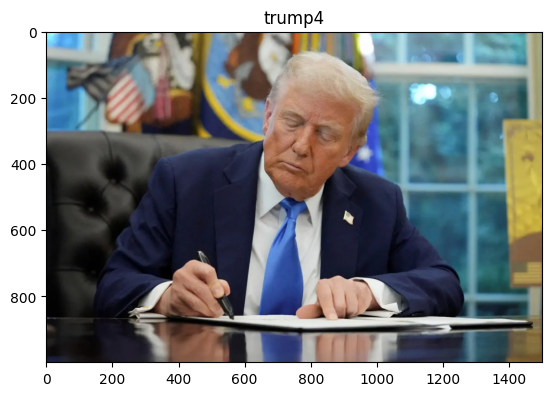

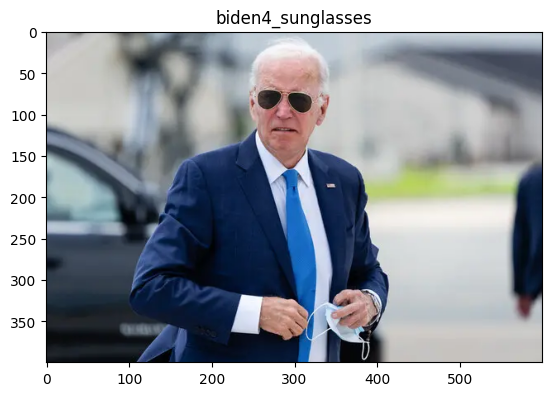

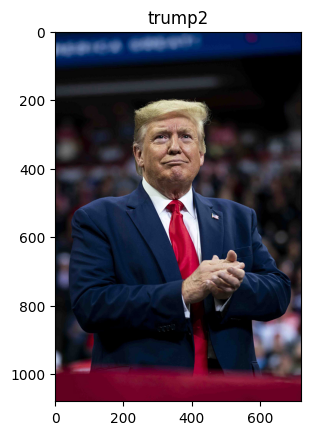

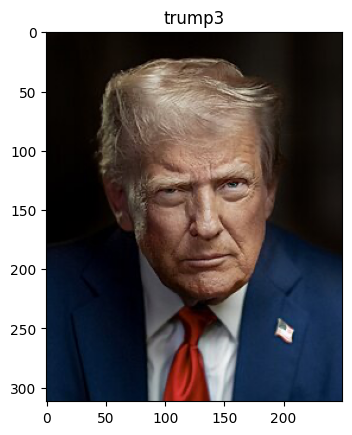

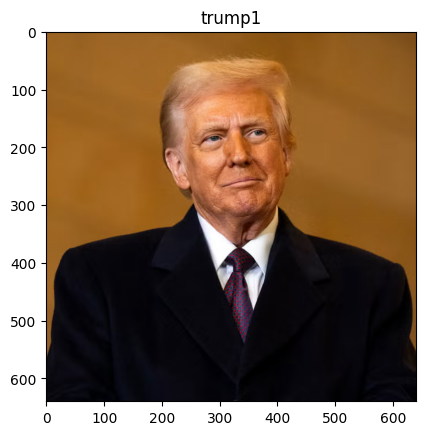

In [4]:
import cv2 
import matplotlib.pyplot as plt 

for face_file in face_files:
    img = cv2.imread(f"Data/faces/{face_file}.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(face_file)
    plt.show()


In [70]:
from deepface import DeepFace 
import pandas as pd

comparison_results = pd.DataFrame(columns=['image1', 'image2', 'verified', 'distance', 'threshold'])

for face_file_1 in face_files:
    for face_file_2 in face_files:
        print(f"Image 1: {face_file_1}, Image 2: {face_file_2}")

        result = DeepFace.verify(
            img1_path = f"Data/faces/{face_file_1}.png", 
            img2_path = f"Data/faces/{face_file_2}.png", 
            model_name='Facenet', 
            enforce_detection=False) 

        # Method 1: Using pd.concat with a new DataFrame
        new_row = pd.DataFrame({
            'image1': [face_file_1],
            'image2': [face_file_2],
            'verified': [result['verified']],
            'distance': [result['distance']],
            'threshold': [result['threshold']]
        })
        comparison_results = pd.concat([comparison_results, new_row], ignore_index=True)

comparison_results


Image 1: macron2, Image 2: macron2
Image 1: macron2, Image 2: macron3
Image 1: macron2, Image 2: macron1
Image 1: macron2, Image 2: macron4
Image 1: macron2, Image 2: macron5
Image 1: macron2, Image 2: obama3
Image 1: macron2, Image 2: obama2
Image 1: macron2, Image 2: obama1
Image 1: macron2, Image 2: biden5
Image 1: macron2, Image 2: biden1
Image 1: macron2, Image 2: biden3
Image 1: macron2, Image 2: biden2
Image 1: macron2, Image 2: trump4
Image 1: macron2, Image 2: biden4_sunglasses
Image 1: macron2, Image 2: trump2
Image 1: macron2, Image 2: trump3
Image 1: macron2, Image 2: trump1
Image 1: macron3, Image 2: macron2
Image 1: macron3, Image 2: macron3
Image 1: macron3, Image 2: macron1
Image 1: macron3, Image 2: macron4
Image 1: macron3, Image 2: macron5
Image 1: macron3, Image 2: obama3
Image 1: macron3, Image 2: obama2
Image 1: macron3, Image 2: obama1
Image 1: macron3, Image 2: biden5
Image 1: macron3, Image 2: biden1
Image 1: macron3, Image 2: biden3
Image 1: macron3, Image 2: 

image1             image2 verified  distance  threshold
0    macron2            macron2     True  0.000000        0.4
1    macron2            macron3     True  0.354972        0.4
2    macron2            macron1     True  0.325240        0.4
3    macron2            macron4    False  0.970994        0.4
4    macron2            macron5     True  0.165302        0.4
..       ...                ...      ...       ...        ...
284   trump1             trump4    False  1.024685        0.4
285   trump1  biden4_sunglasses    False  0.603120        0.4
286   trump1             trump2     True  0.286029        0.4
287   trump1             trump3     True  0.391488        0.4
288   trump1             trump1     True  0.000000        0.4

[289 rows x 5 columns]

In [71]:
import IPython.display as display

# Method 1: Simple scrollable display without sticky headers
display.display(
    comparison_results.style
        .set_table_attributes('style="display:inline-block;overflow-x:auto;max-height:400px;overflow-y:auto;border:1px solid #ccc"')
)

print("\n" + "="*50)
print("Alternative display methods:")
print("="*50)

# Method 2: Using HTML with sticky headers (more compatible)
from IPython.display import HTML

html_table = comparison_results.to_html(
    classes='table table-striped table-hover',
    table_id='comparison-table',
    escape=False
)

# Add CSS for sticky headers and scrolling
css_style = """
<style>
#comparison-table {
    max-height: 400px;
    overflow-y: auto;
    overflow-x: auto;
    display: block;
    border: 1px solid #ccc;
}

#comparison-table thead {
    position: sticky;
    top: 0;
    background-color: #f8f9fa;
    z-index: 10;
}

#comparison-table th {
    background-color: #f8f9fa;
    border: 1px solid #dee2e6;
    padding: 8px;
    text-align: left;
}

#comparison-table td {
    border: 1px solid #dee2e6;
    padding: 8px;
}

#comparison-table tbody tr:hover {
    background-color: #f5f5f5;
}
</style>
"""

display.display(HTML(css_style + html_table))


Alternative display methods:


In [72]:
# Create a matrix with image1 as rows, image2 as columns, and values as 'verified'
comparison_matrix = comparison_results.pivot(index='image1', columns='image2', values='verified')
comparison_matrix

image2            biden1 biden2 biden3 biden4_sunglasses biden5 macron1  \
image1                                                                    
biden1              True   True   True             False   True   False   
biden2              True   True   True             False   True   False   
biden3              True   True   True             False   True   False   
biden4_sunglasses  False  False  False              True  False   False   
biden5              True   True   True             False   True   False   
macron1            False  False  False             False  False    True   
macron2            False  False  False             False  False    True   
macron3            False  False  False             False  False   False   
macron4            False  False  False             False  False   False   
macron5            False  False  False             False  False   False   
obama1             False  False  False             False  False   False   
obama2             False  False  False             False  False   False   
obama3             False  False  False             False  False   False   
trump1             False  False  False             False  False   False   
trump2             False  False  False             False   True   False   
trump3             False  False  False             False  False   False   
trump4             False  False  False             False  False   False   

image2            macron2 macron3 macron4 macron5 obama1 obama2 obama3 trump1  \
image1                                                                          
biden1              False   False   False   False  False  False  False  False   
biden2              False   False   False   False  False  False  False  False   
biden3              False   False   False   False  False  False  False  False   
biden4_sunglasses   False   False   False   False  False  False  False  False   
biden5              False   False   False   False  False  False  False  False   
macron1              True   False   False   False  False  False  False  False   
macron2              True    True   False    True  False  False  False  False   
macron3              True    True   False    True  False  False  False  False   
macron4             False   False    True   False  False  False  False  False   
macron5              True    True   False    True  False  False  False  False   
obama1              False   False   False   False   True   True   True  False   
obama2              False   False   False   False   True   True   True  False   
obama3              False   False   False   False   True   True   True  False   
trump1              False   False   False   False  False  False  False   True   
trump2              False   False   False   False  False  False  False   True   
trump3              False   False   False   False  False  False  False   True   
trump4              False   False    True   False  False  False  False  False   

image2            trump2 trump3 trump4  
image1                                  
biden1             False  False  False  
biden2             False  False  False  
biden3             False  False  False  
biden4_sunglasses  False  False  False  
biden5              True  False  False  
macron1            False  False  False  
macron2            False  False  False  
macron3            False  False  False  
macron4            False  False   True  
macron5            False  False  False  
obama1             False  False  False  
obama2             False  False  False  
obama3             False  False  False  
trump1              True   True  False  
trump2              True  False  False  
trump3             False   True  False  
trump4             False  False   True

# Look for face

In [88]:
face_search = 'trump6_video'

result = DeepFace.find(
            img_path = f"Data/faces/{face_search}.png", 
            db_path = "Data/faces", 
            model_name='Facenet', 
            enforce_detection=False) 

result[0]

25-10-25 00:16:00 - Searching Data/faces/trump6_video.png in 20 length datastore
25-10-25 00:16:01 - find function duration 0.6993522644042969 seconds


identity                                      hash  \
0  Data/faces/trump6_video.png  851766dc5c4f22f215bc1d45e18b226730ac6634   
1  Data/faces/trump6_video.png  851766dc5c4f22f215bc1d45e18b226730ac6634   
2        Data/faces/trump4.png  5d9d2fb04d87bd2385de7c19072709359eb23362   
3       Data/faces/macron4.png  824fee3ff4953b2860c7a476a23aeba5fd689fbc   

   target_x  target_y  target_w  target_h  threshold  source_x  source_y  \
0      1247       101       494       494        0.4      1247       101   
1         0       435       265       265        0.4      1247       101   
2         0         0      1499       999        0.4      1247       101   
3         0         0      1159       772        0.4      1247       101   

   source_w  source_h  distance  confidence  
0       494       494  0.042510      100.00  
1       494       494  0.183155       85.42  
2       494       494  0.213164       80.31  
3       494       494  0.348662       55.48

# Generate Embeddings

In [39]:
import numpy as np
from deepface import DeepFace 


face_search_1 = 'trump5_video'
face_search_2 = 'trump6_video'

result1 = DeepFace.represent(
            img_path = f"Data/faces/{face_search_1}.png", 
            model_name='Facenet', 
            enforce_detection=False) 

result2 = DeepFace.represent(
            img_path = f"Data/faces/{face_search_2}.png", 
            model_name='Facenet', 
            enforce_detection=False) 

emb1 = np.array(result1[0]['embedding'])
emb2 = np.array(result2[0]['embedding'])

In [40]:
cosine_sim = emb1.dot(emb2) / np.sqrt((emb1.dot(emb1) * emb2.dot(emb2)))

cosine_sim

np.float64(0.45963039832280295)

In [46]:
import os

files_to_embed_dir = "Data/video_frames"
files_to_embed = [os.path.splitext(f)[0] for f in os.listdir(faces_dir) if os.path.isfile(os.path.join(faces_dir, f)) and f.endswith('.png')]


In [47]:
import cv2 
import matplotlib.pyplot as plt 

for face_file in files_to_embed:
    img = cv2.imread(f"{files_to_embed_dir}/{face_file}.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(face_file)
    plt.show()


[ WARN:0@2026.186] global loadsave.cpp:268 findDecoder imread_('Data/video_frames/macron2.png'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import os 
import pickle
import numpy as np

embeddings_dir = "Data/embeddings/video_frames"


os.makedirs(embeddings_dir, exist_ok=False)
print(f"Saving embeddings to {embeddings_dir}")

for face_file in files_to_embed:
    result = DeepFace.represent(
            img_path = f"{files_to_embed_dir}/{face_file}.png", 
            model_name='Facenet', 
            enforce_detection=False) 

    emb = np.array(result[0]['embedding'])
    file_path = f"Data/embeddings/{face_file}.pkl"

    with open(file_path, "wb") as file:
        pickle.dump(emb, file)

    print(f"Stored {face_file} to path: {file_path}")

Saving embeddings to Data/embeddings
Stored macron2 to path: Data/embeddings/macron2.pkl
Stored macron3 to path: Data/embeddings/macron3.pkl
Stored macron1 to path: Data/embeddings/macron1.pkl
Stored macron4 to path: Data/embeddings/macron4.pkl
Stored macron5 to path: Data/embeddings/macron5.pkl
Stored obama3 to path: Data/embeddings/obama3.pkl
Stored obama2 to path: Data/embeddings/obama2.pkl
Stored trump6_video to path: Data/embeddings/trump6_video.pkl
Stored obama1 to path: Data/embeddings/obama1.pkl
Stored biden5 to path: Data/embeddings/biden5.pkl
Stored biden1 to path: Data/embeddings/biden1.pkl
Stored trump5_video to path: Data/embeddings/trump5_video.pkl
Stored biden3 to path: Data/embeddings/biden3.pkl
Stored biden2 to path: Data/embeddings/biden2.pkl
Stored trump4 to path: Data/embeddings/trump4.pkl
Stored biden4_sunglasses to path: Data/embeddings/biden4_sunglasses.pkl
Stored trump2 to path: Data/embeddings/trump2.pkl
Stored trump3 to path: Data/embeddings/trump3.pkl
Stored 

In [34]:
with open("Data/embeddings/biden1.pkl", 'rb') as file: 
    obama_emb = pickle.load(file)

obama_emb

array([-0.90359807,  1.29896367, -1.25361598,  0.0999522 ,  0.80093163,
       -1.1950804 , -1.18175876,  0.65291011, -1.17427659, -0.90170735,
       -1.74900413,  1.55700624,  0.12968867, -0.18240008,  0.44678804,
       -0.27502143,  0.29087865, -1.21685266, -0.3289268 ,  1.29448593,
        1.13164306,  0.20174283,  0.59188718, -0.2566945 , -0.80948234,
       -1.60497415, -0.18582565,  1.42728341,  1.28968787, -0.16636811,
       -1.63566267,  1.07048726, -0.60331637,  0.618231  , -0.82872933,
       -2.52718544,  0.16471073, -1.69404984, -0.20218757, -2.03635859,
       -1.91663766,  0.70207053, -2.27449155,  0.0361719 , -0.68447393,
       -1.91170704, -0.09871964, -1.03588724,  0.38336426,  1.90917277,
       -1.09392715,  0.82586408,  0.58902806, -0.92780924,  0.41420326,
       -0.75875312,  0.18367593, -1.28271735,  0.00765985,  1.5449723 ,
       -1.41300333,  0.21932618,  0.18149602,  0.16641203, -1.7471714 ,
        0.8251313 ,  0.86483949,  0.82772034,  0.31914794, -1.10